In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, index_col='Month', parse_dates=True)
ts = data['Passengers']


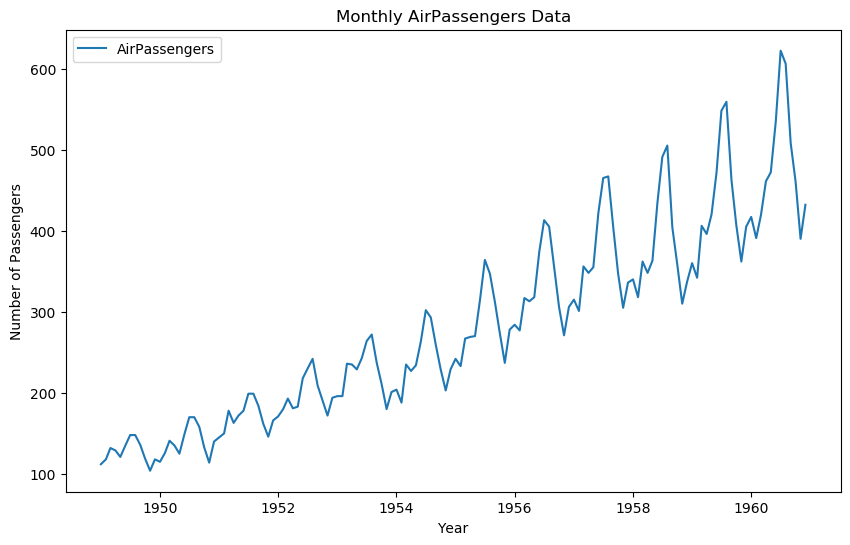

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(ts, label='AirPassengers')
plt.title('Monthly AirPassengers Data')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [4]:
model = SimpleExpSmoothing(ts)
model_fit = model.fit(smoothing_level=0.2, optimized=False)
print(model_fit.summary())


                       SimpleExpSmoothing Model Results                       
Dep. Variable:             Passengers   No. Observations:                  144
Model:             SimpleExpSmoothing   SSE                         327021.846
Optimized:                      False   AIC                           1116.828
Trend:                           None   BIC                           1122.767
Seasonal:                        None   AICC                          1117.115
Seasonal Periods:                None   Date:                 Wed, 24 Jul 2024
Box-Cox:                        False   Time:                         18:46:51
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial_level              112.00000                

D:\Users\vgrex\anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Users\vgrex\anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [5]:
n_forecast = 12
forecast = model_fit.forecast(n_forecast)


D:\Users\vgrex\anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


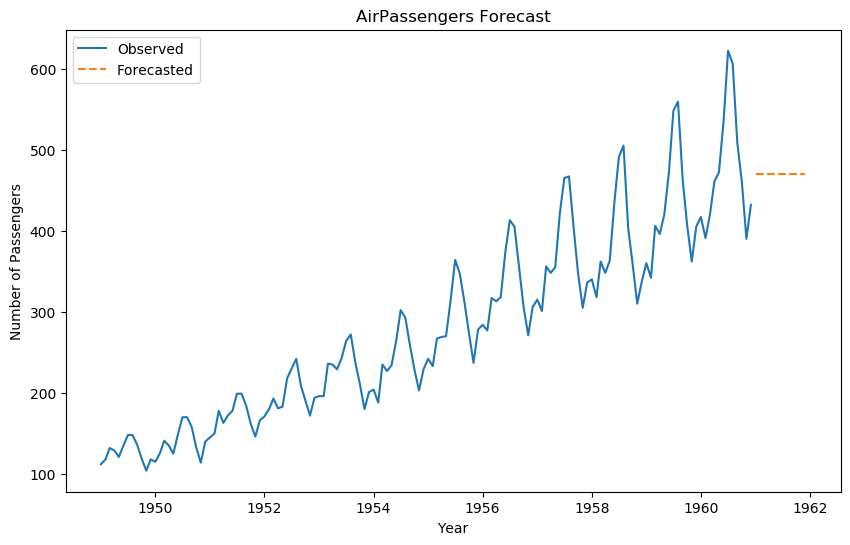

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Observed')
plt.plot(forecast, label='Forecasted', linestyle='--')
plt.title('AirPassengers Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
